# Diamonds Linear Regression (Predict Price)


## Appendex
- Cick on the links:
    >1. <a href=#imports>Imports</a>
    >2. <a href=#loaddata>Load Data</a>
    >3. <a href=#dataformating>Data Formating</a>
    >4. <a href=#validat>Validate Assumption(Optional If exist)</a>
    >5. <a href=#Expl>Exploratory Data Analysis (Uni-Variable)</a>
    >6. <a href=#Ques> Baseline Model </a>
    >7. <a href=#Conc> Data Prep</a>
    >8. <a herf=#ff>Experimentations</a>
    

## Abstract

Have you ever asked yourself, how are diamonds priced? Well, this project talks about the diamonds price prediction based on their cut, color, clarity & 
other attributes and it also covers the building a simple linear regression model using Python.

## Design

This project is one of the T5 Data Science Boot Camp requirements. Data provided by Kaggle . In this module, we will be laying the foundation for our analysis by processing and exploring a large amount of data on diamond datasets. This dataset has been made available thanks to Kaggle which is the home for many such datasets and competitions.


# <a name='imports' > Import Libraries </a>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'png'




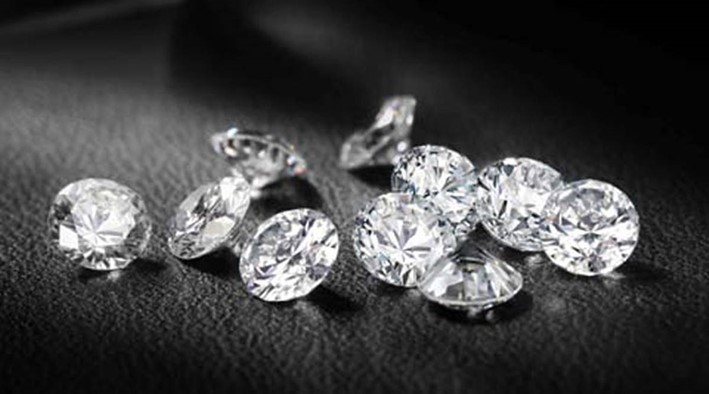

In [2]:
from IPython.display import Image
Image(filename='diamond.jpg')

# <a name='loaddata' > Load Data </a>

In [6]:
df = pd.read_csv('diamonds.csv')

In [7]:
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [8]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

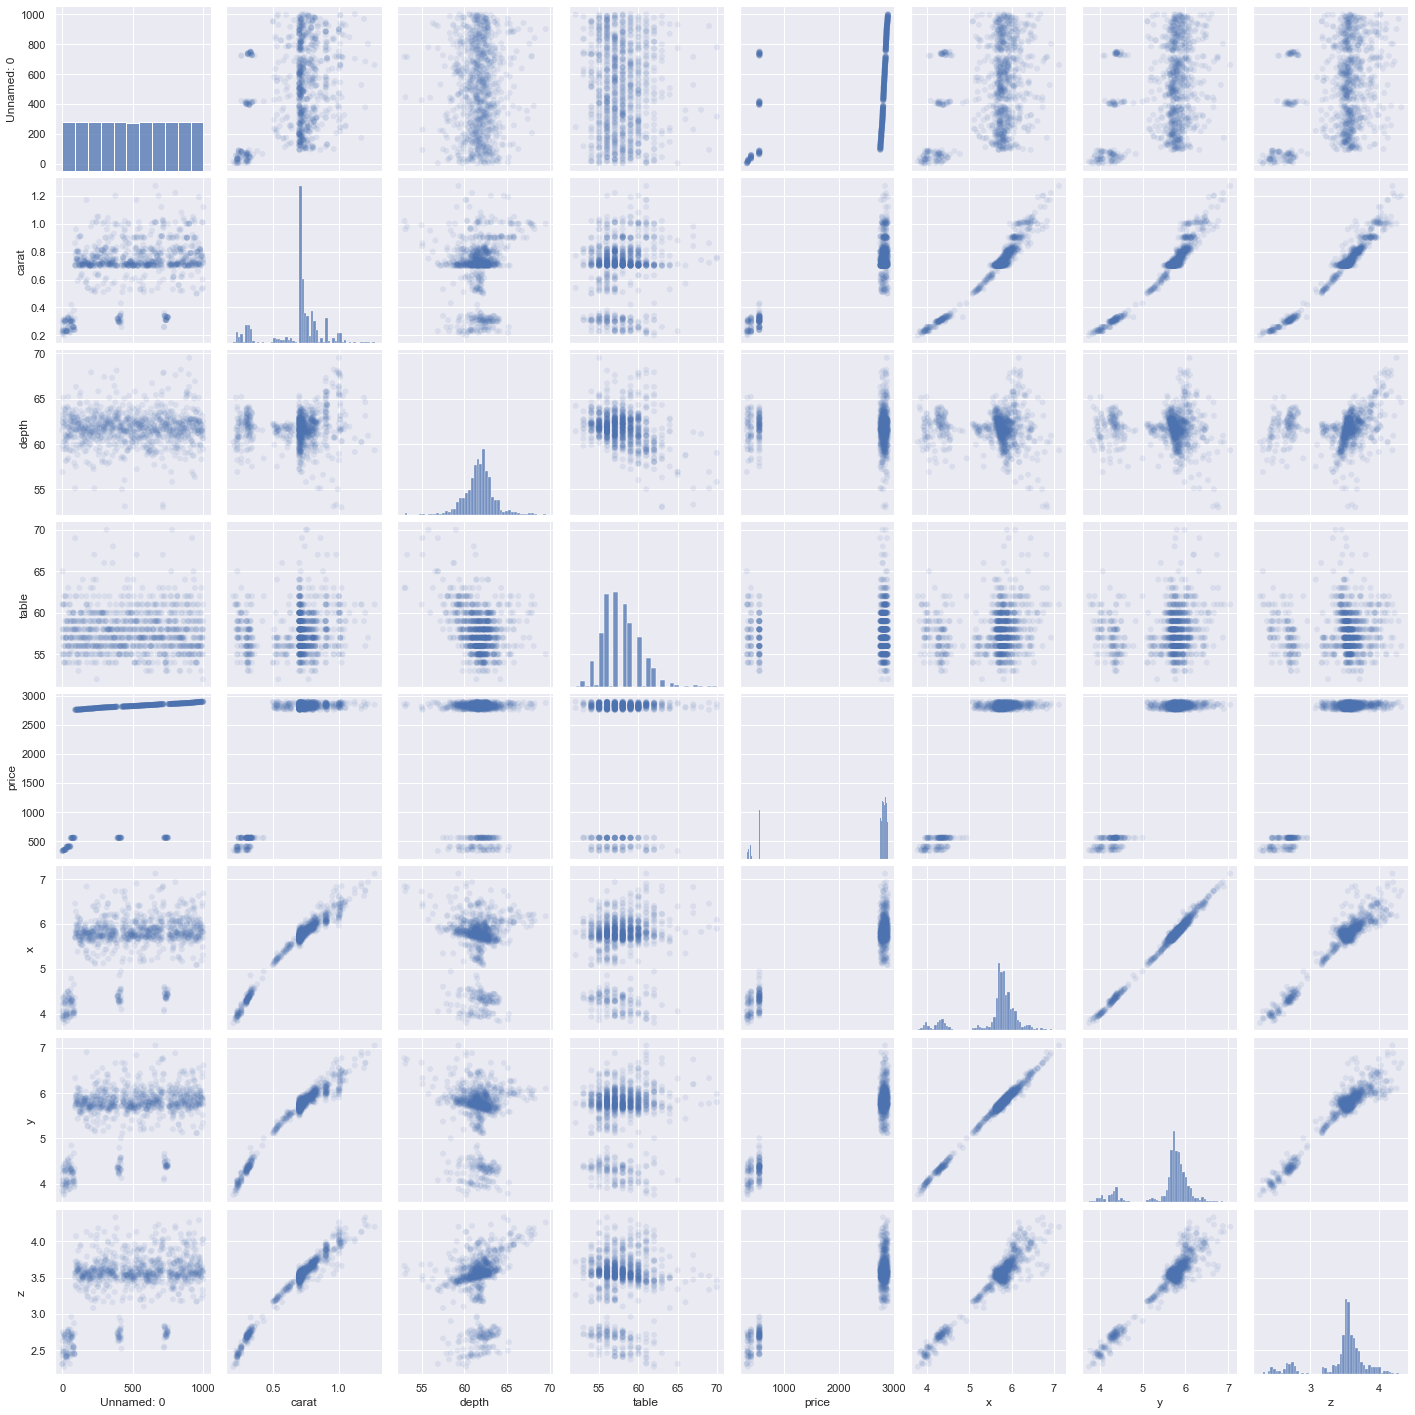

In [9]:
sns.pairplot(df[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

# <a name='dataformating' > Data Formating </a>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [11]:
df.shape

(53940, 11)

# Check null value 

In [12]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [13]:
sum(df.duplicated())

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [15]:
df.tail(20)

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53920       53921   0.70  Very Good     E     VS2   62.4   60.0   2755  5.57   
53921       53922   0.70  Very Good     E     VS2   62.8   60.0   2755  5.59   
53922       53923   0.70  Very Good     D     VS1   63.1   59.0   2755  5.67   
53923       53924   0.73      Ideal     I     VS2   61.3   56.0   2756  5.80   
53924       53925   0.73      Ideal     I     VS2   61.6   55.0   2756  5.82   
53925       53926   0.79      Ideal     I     SI1   61.6   56.0   2756  5.95   
53926       53927   0.71      Ideal     E     SI1   61.9   56.0   2756  5.71   
53927       53928   0.79       Good     F     SI1   58.1   59.0   2756  6.06   
53928       53929   0.79    Premium     E     SI2   61.4   58.0   2756  6.03   
53929       53930   0.71      Ideal     G     VS1   61.4   56.0   2756  5.76   
53930       53931   0.71    Premium     E     SI1   60.5   55.0   2756  5.79   
53931       53932   0.71    Premium     F     SI1   59.8   62.0   2756  5.74   
53932       53933   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71   
53933       53934   0.70  Very Good     E     VS2   61.2   59.0   2757  5.69   
53934       53935   0.72    Premium     D     SI1   62.7   59.0   2757  5.69   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
53920  5.61  3.49  
53921  5.65  3.53  
53922  5.58  3.55  
53923  5.84  3.57  
53924  5.84  3.59  
53925  5.97  3.67  
53926  5.73  3.54  
53927  6.13  3.54  
53928  5.96  3.68  
53929  5.73  3.53  
53930  5.74  3.49  
53931  5.73  3.43  
53932  5.76  3.47  
53933  5.72  3.49  
53934  5.73  3.58  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64

In [16]:
df.shape

(53940, 11)

## <a name='Expl' > Exploratory Data Analysis (Uni-Variable) </a>

<AxesSubplot:>

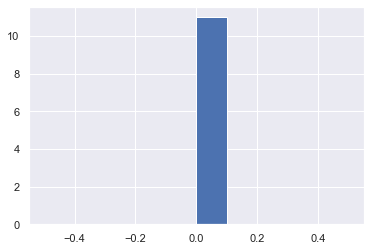

In [17]:
# To check null value 
(df.isna().sum() / len(df) * 100.00).hist()

In [18]:
# Discover outliers with Quartile calculations (IQR)

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Unnamed: 0    26969.50
carat             0.64
depth             1.50
table             3.00
price          4374.25
x                 1.83
y                 1.82
z                 1.13
dtype: float64


In [20]:
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

Unnamed: 0  carat  clarity  color    cut  depth  price  table      x  \
0           False  False    False  False  False  False  False  False  False   
1           False  False    False  False  False  False  False  False  False   
2           False  False    False  False  False   True  False   True  False   
3           False  False    False  False  False  False  False  False  False   
4           False  False    False  False  False  False  False  False  False   
...           ...    ...      ...    ...    ...    ...    ...    ...    ...   
53935       False  False    False  False  False  False  False  False  False   
53936       False  False    False  False  False  False  False  False  False   
53937       False  False    False  False  False  False  False  False  False   
53938       False  False    False  False  False  False  False  False  False   
53939       False  False    False  False  False  False  False  False  False   

           y      z  
0      False  False  
1      False  False  
2      False  False  
3      False  False  
4      False  False  
...      ...    ...  
53935  False  False  
53936  False  False  
53937  False  False  
53938  False  False  
53939  False  False  

[53940 rows x 11 columns]

<AxesSubplot:xlabel='carat'>

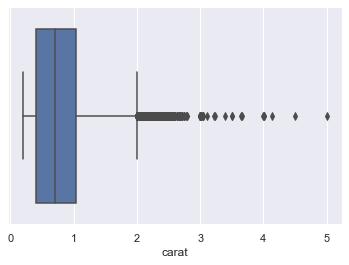

In [21]:
sns.boxplot(df['carat'])

In [22]:
 df=df[df['carat']<=20]

<AxesSubplot:xlabel='carat'>

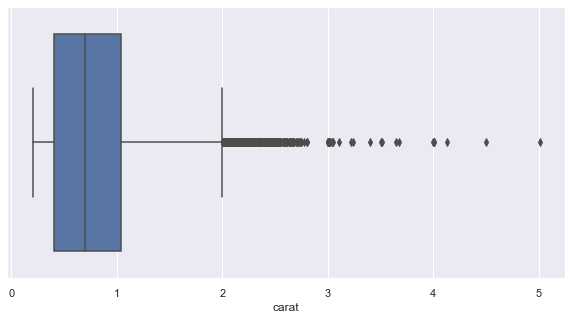

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x='carat', data= df)

In [24]:
df.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [25]:
df = df.loc[(df[['x','y','z']]!=0).all(axis=1)]

In [26]:
df.shape

(53920, 11)

In [27]:
df.describe()

Unnamed: 0         carat         depth         table         price  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean   26972.355731      0.797698     61.749514     57.456834   3930.993231   
std    15571.269010      0.473795      1.432331      2.234064   3987.280446   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13487.750000      0.400000     61.000000     56.000000    949.000000   
50%    26973.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40457.250000      1.040000     62.500000     59.000000   5323.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53920.000000  53920.000000  53920.000000  
mean       5.731627      5.734887      3.540046  
std        1.119423      1.140126      0.702530  
min        3.730000      3.680000      1.070000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [28]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [29]:
df.corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.028259  0.181646  0.921592  0.977779  0.953991  0.961048
depth  0.028259  1.000000 -0.295733 -0.010729 -0.025017 -0.029069  0.095023
table  0.181646 -0.295733  1.000000  0.127245  0.196097  0.184493  0.152483
price  0.921592 -0.010729  0.127245  1.000000  0.887231  0.867864  0.868206
x      0.977779 -0.025017  0.196097  0.887231  1.000000  0.974918  0.975435
y      0.953991 -0.029069  0.184493  0.867864  0.974918  1.000000  0.956744
z      0.961048  0.095023  0.152483  0.868206  0.975435  0.956744  1.000000

In [30]:
df_c = df.copy()

In [31]:
df_c

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53920 rows x 10 columns]

In [32]:
pd.get_dummies(df_c, columns=["cut","color","clarity"], prefix = 'C').head(10)

carat  depth  table  price     x     y     z  C_Fair  C_Good  C_Ideal  ...  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43       0       0        1  ...   
1   0.21   59.8   61.0    326  3.89  3.84  2.31       0       0        0  ...   
2   0.23   56.9   65.0    327  4.05  4.07  2.31       0       1        0  ...   
3   0.29   62.4   58.0    334  4.20  4.23  2.63       0       0        0  ...   
4   0.31   63.3   58.0    335  4.34  4.35  2.75       0       1        0  ...   
5   0.24   62.8   57.0    336  3.94  3.96  2.48       0       0        0  ...   
6   0.24   62.3   57.0    336  3.95  3.98  2.47       0       0        0  ...   
7   0.26   61.9   55.0    337  4.07  4.11  2.53       0       0        0  ...   
8   0.22   65.1   61.0    337  3.87  3.78  2.49       1       0        0  ...   
9   0.23   59.4   61.0    338  4.00  4.05  2.39       0       0        0  ...   

   C_I  C_J  C_I1  C_IF  C_SI1  C_SI2  C_VS1  C_VS2  C_VVS1  C_VVS2  
0    0    0     0     0      0      1      0      0       0       0  
1    0    0     0     0      1      0      0      0       0       0  
2    0    0     0     0      0      0      1      0       0       0  
3    1    0     0     0      0      0      0      1       0       0  
4    0    1     0     0      0      1      0      0       0       0  
5    0    1     0     0      0      0      0      0       0       1  
6    1    0     0     0      0      0      0      0       1       0  
7    0    0     0     0      1      0      0      0       0       0  
8    0    0     0     0      0      0      0      1       0       0  
9    0    0     0     0      0      0      1      0       0       0  

[10 rows x 27 columns]

## <a name='Ques' > Baseline Model </a>

In [33]:
pd.get_dummies(df_c, columns=["cut","color","clarity"], prefix = 'C').head(10)

carat  depth  table  price     x     y     z  C_Fair  C_Good  C_Ideal  ...  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43       0       0        1  ...   
1   0.21   59.8   61.0    326  3.89  3.84  2.31       0       0        0  ...   
2   0.23   56.9   65.0    327  4.05  4.07  2.31       0       1        0  ...   
3   0.29   62.4   58.0    334  4.20  4.23  2.63       0       0        0  ...   
4   0.31   63.3   58.0    335  4.34  4.35  2.75       0       1        0  ...   
5   0.24   62.8   57.0    336  3.94  3.96  2.48       0       0        0  ...   
6   0.24   62.3   57.0    336  3.95  3.98  2.47       0       0        0  ...   
7   0.26   61.9   55.0    337  4.07  4.11  2.53       0       0        0  ...   
8   0.22   65.1   61.0    337  3.87  3.78  2.49       1       0        0  ...   
9   0.23   59.4   61.0    338  4.00  4.05  2.39       0       0        0  ...   

   C_I  C_J  C_I1  C_IF  C_SI1  C_SI2  C_VS1  C_VS2  C_VVS1  C_VVS2  
0    0    0     0     0      0      1      0      0       0       0  
1    0    0     0     0      1      0      0      0       0       0  
2    0    0     0     0      0      0      1      0       0       0  
3    1    0     0     0      0      0      0      1       0       0  
4    0    1     0     0      0      1      0      0       0       0  
5    0    1     0     0      0      0      0      0       0       1  
6    1    0     0     0      0      0      0      0       1       0  
7    0    0     0     0      1      0      0      0       0       0  
8    0    0     0     0      0      0      0      1       0       0  
9    0    0     0     0      0      0      1      0       0       0  

[10 rows x 27 columns]

In [34]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [35]:
def convert_catg(df1):
 from sklearn.preprocessing import LabelEncoder
 le = LabelEncoder()
# Find the columns of object type along with their column index
 object_cols = list(df1.select_dtypes(exclude=[np.number]).columns)
 object_cols_ind = []
 for col in object_cols:
    object_cols_ind.append(df1.columns.get_loc(col))
 
# Encode the categorical columns with numbers 
 for i in object_cols_ind:
    df1.iloc[:,i] = le.fit_transform(df1.iloc[:,i])

In [36]:
convert_catg(df_c)

In [37]:
#Separate our features from our target
X = df_c.drop(['price'], axis = 1)
y = df_c['price']

In [38]:
X.color.nunique()

7

In [39]:
X.clarity.nunique()

8

In [40]:
X.cut.nunique()

5

In [41]:
df_c.head(5)

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

In [42]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int32  
 2   color    53920 non-null  int32  
 3   clarity  53920 non-null  int32  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.9 MB


In [43]:
print(df_c['cut'].dtypes)

int32


In [44]:
df_c.corr()

carat       cut     color   clarity     depth     table     price  \
carat    1.000000  0.017193  0.291360 -0.214227  0.028259  0.181646  0.921592   
cut      0.017193  1.000000  0.000253  0.028196 -0.194309  0.150708  0.039889   
color    0.291360  0.000253  1.000000 -0.027689  0.047373  0.026481  0.172431   
clarity -0.214227  0.028196 -0.027689  1.000000 -0.053200 -0.088028 -0.071570   
depth    0.028259 -0.194309  0.047373 -0.053200  1.000000 -0.295733 -0.010729   
table    0.181646  0.150708  0.026481 -0.088028 -0.295733  1.000000  0.127245   
price    0.921592  0.039889  0.172431 -0.071570 -0.010729  0.127245  1.000000   
x        0.977779  0.022007  0.270671 -0.225963 -0.025017  0.196097  0.887231   
y        0.953991  0.027305  0.263915 -0.217730 -0.029069  0.184493  0.867864   
z        0.961048  0.001678  0.270011 -0.226215  0.095023  0.152483  0.868206   

                x         y         z  
carat    0.977779  0.953991  0.961048  
cut      0.022007  0.027305  0.001678  
color    0.270671  0.263915  0.270011  
clarity -0.225963 -0.217730 -0.226215  
depth   -0.025017 -0.029069  0.095023  
table    0.196097  0.184493  0.152483  
price    0.887231  0.867864  0.868206  
x        1.000000  0.974918  0.975435  
y        0.974918  1.000000  0.956744  
z        0.975435  0.956744  1.000000

In [45]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [46]:
split_and_validate(X, y)


Validation R^2 score was: 0.889491407710001
Feature coefficient results: 

carat : 11101.09
cut : 73.19
color : -267.77
clarity : 288.00
depth : -98.38
table : -92.39
x : -729.81
y : 125.86
z : -968.85


## <a name='Ques' > Experimentations </a>

# Basic feature engineering: adding polynomial terms

In [47]:
X2 = X.copy()

X2['O'] = X2['color'] ** 2
X2['G'] = X2['x'] ** 2

split_and_validate(X2, y)


Validation R^2 score was: 0.8781979520306362
Feature coefficient results: 

carat : 2280.56
cut : 68.08
color : 151.73
clarity : 277.08
depth : -91.96
table : -63.26
x : -6816.43
y : -17.74
z : 2136.68
O : -77.63
G : 670.28


In [48]:
X2 = X.copy()

X2['l'] = X2['carat'] ** 2
X2['n'] = X2['x'] ** 2

split_and_validate(X2, y)


Validation R^2 score was: 0.8980898085718779
Feature coefficient results: 

carat : 15705.98
cut : 45.85
color : -279.60
clarity : 270.09
depth : -163.87
table : -87.25
x : -9838.00
y : 4.93
z : 798.27
l : -2757.13
n : 715.11


In [49]:
X2 = X.copy()

X2['O'] = X2['cut'] ** 2
X2['G'] = X2['x'] ** 2

split_and_validate(X2, y)


Validation R^2 score was: 0.8727092209355655
Feature coefficient results: 

carat : 2554.63
cut : 650.52
color : -273.48
clarity : 279.28
depth : -64.69
table : -40.88
x : -6595.95
y : -13.15
z : 2247.57
O : -117.85
G : 635.08


# Basic feature engineering: adding interaction terms

In [50]:
X3 = X2.copy()

# multiplicative interaction
X3['color'] = X3['cut'] * X3['x']

# division interaction
X3['color'] = X3['cut'] / X3['x']

split_and_validate(X3, y)


Validation R^2 score was: 0.8619044822130812
Feature coefficient results: 

carat : 2573.61
cut : 792.41
color : -1140.85
clarity : 271.56
depth : -84.82
table : -39.25
x : -6451.82
y : -17.33
z : 2204.42
O : -105.59
G : 607.46


In [51]:
X3 = X2.copy()

# multiplicative interaction
X3['color'] = X3['depth'] * X3['y']

# division interaction
X3['color'] = X3['depth'] / X3['y']

split_and_validate(X3, y)


Validation R^2 score was: 0.8555657060747349
Feature coefficient results: 

carat : 4112.59
cut : 609.86
color : 650.80
clarity : 270.72
depth : -252.10
table : -49.53
x : -2360.64
y : 78.62
z : 2497.18
O : -109.11
G : 296.78


In [52]:
X3 = X2.copy()

# multiplicative interaction
X3['x'] = X3['z'] * X3['depth']

# division interaction
X3['x'] = X3['z'] / X3['depth']

split_and_validate(X3, y)


Validation R^2 score was: 0.8750086106154767
Feature coefficient results: 

carat : 10962.31
cut : 734.36
color : -270.42
clarity : 285.82
depth : 380.56
table : -63.81
x : 373022.32
y : 111.22
z : -8080.99
O : -133.05
G : 0.40


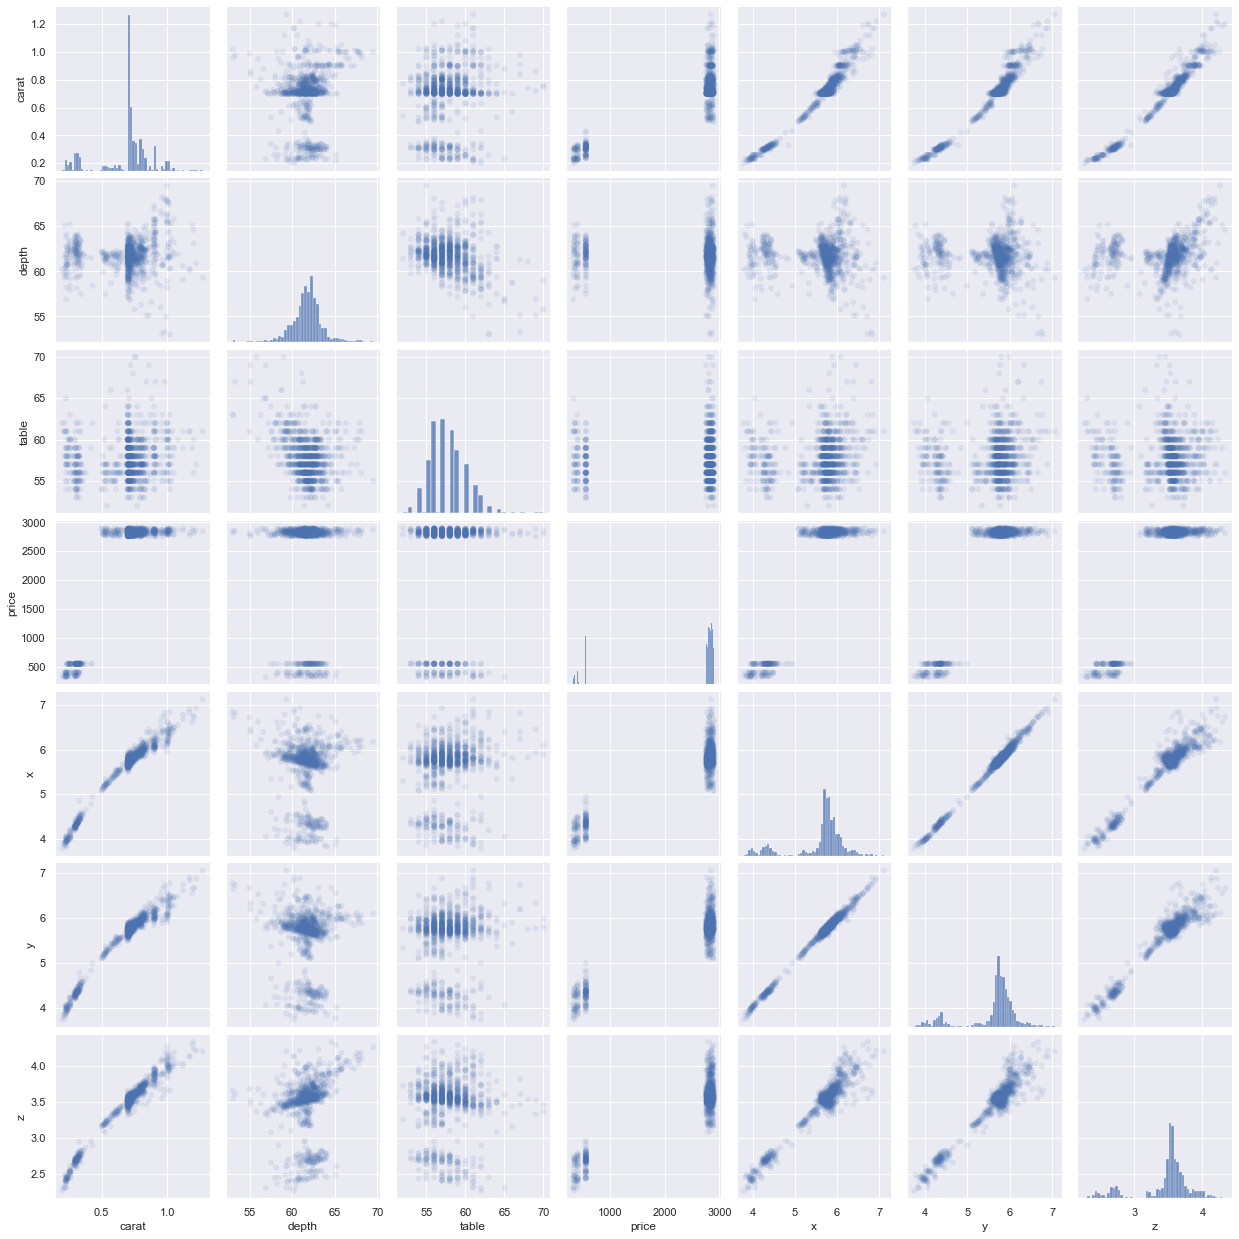

In [53]:
sns.pairplot(df[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

In [58]:
y_log = np.log(y)

In [62]:
lm =LinearRegression()
lm.fit(X,y_log)
lm.score(X,y_log)

0.9561481016546646

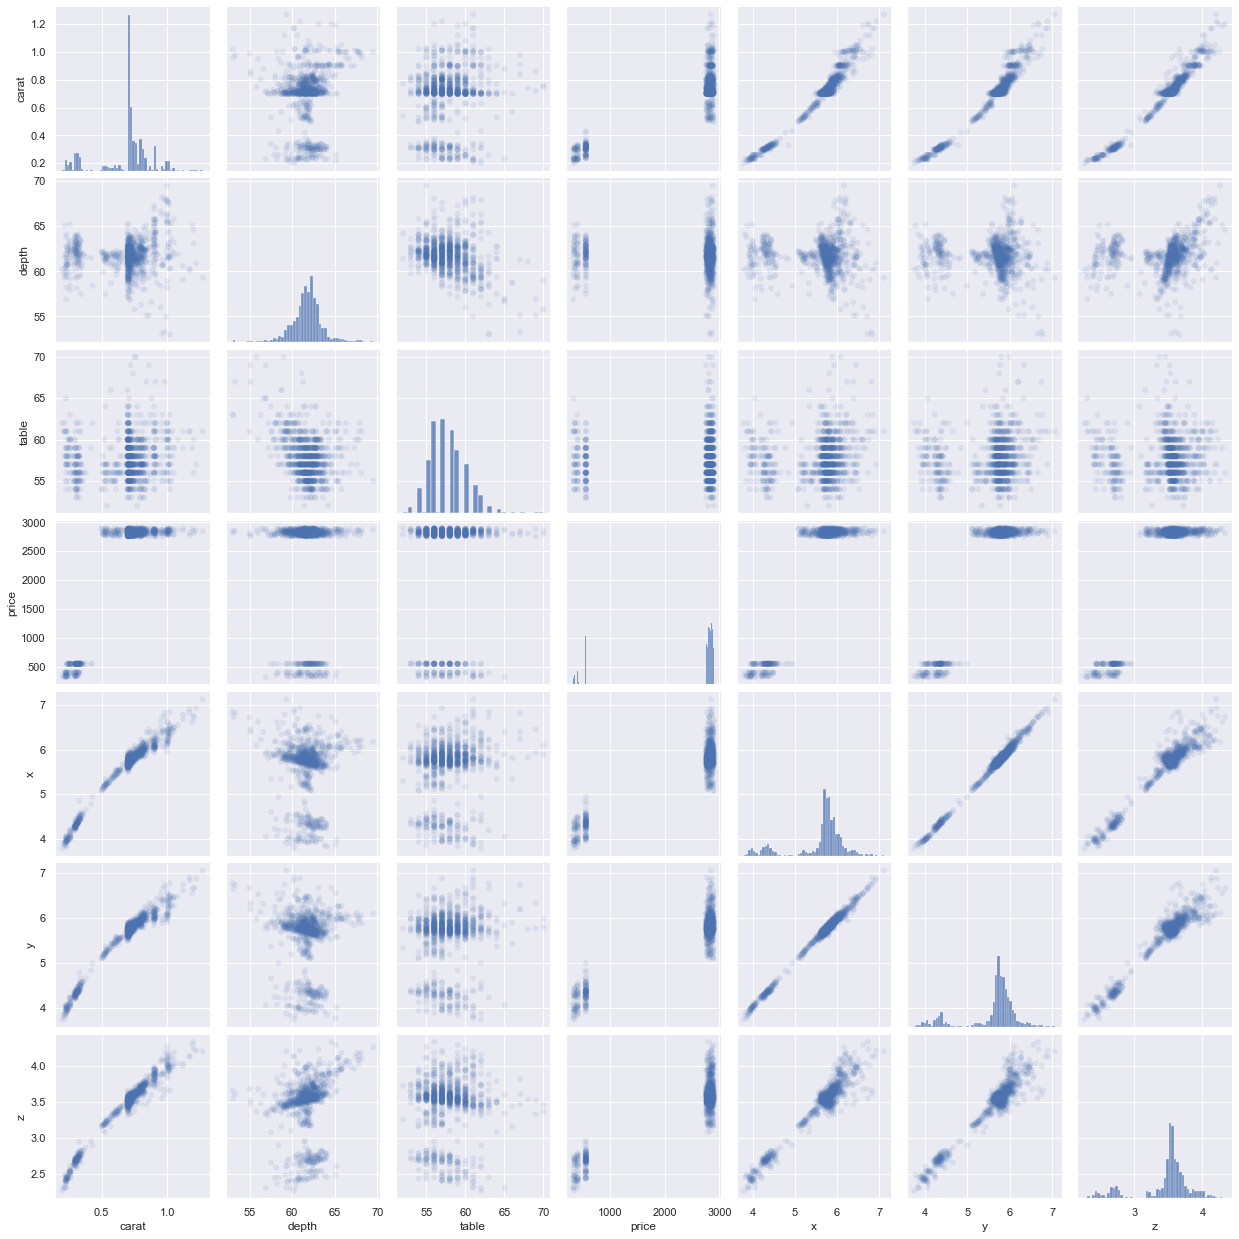

In [63]:
sns.pairplot(df[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))